In [39]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [12]:
df = pd.read_csv("land_points.csv")
df_sample = df.sample(20)

In [16]:
def weather_query(lat, lon):
    api_key = "8b24eaf5dfd549c4a9710855240211"
    url = f"http://api.weatherapi.com/v1/current.json?key={api_key}&q={lat}, {lon}&aqi=no"
    # http://api.weatherapi.com/v1/current.json?key=8b24eaf5dfd549c4a9710855240211&q=61.012533, -139.533767&aqi=no
    response = requests.get(url)

    if response.status_code == 200:
        data = str(response.json())
    else:
        data = "failed"
    return data

In [18]:
def df_request(df):
    df['weather'] = "no requested"
    for i in df.index:
        df.loc[i, "weather"] = weather_query(df.loc[i, "lat"],
                                        df.loc[i, "lon"])
    return df

In [44]:
df_results = df_request(df)

In [45]:
len(df_results.weather.unique())

1424

In [46]:
df_results.shape

(1653, 5)

In [47]:
df_results.weather.value_counts()

weather
failed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      111
{'location': {'name': 'Alert', 'region': 'Nunavut', 'country': 'Canada', 'lat': 82.4833, 'lon': 

In [48]:
df["request_failed"] = df.weather == "failed"

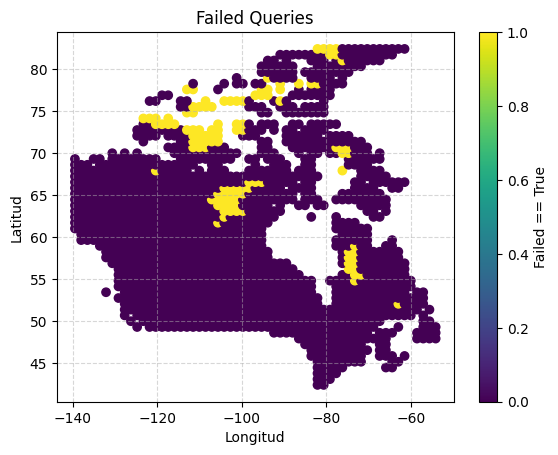

In [49]:
plt.scatter(df['lon'], df['lat'], c=df['request_failed'], cmap='viridis', marker='o')

# Etiquetas y título
plt.title('Failed Queries')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Failed == True')  # Barra de color para indicar la escala
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'failed_canada_query_{str(datetime.now())}.png', dpi=300, bbox_inches='tight')
plt.show()